In [1]:
import numpy as np
import cmcrameri.cm as cmc
from pykitPIV import Particle, FlowField, Motion, Image

/Users/kamilazdybal/anaconda3/envs/latest-stack/lib/python3.10/site-packages/torchvision/io/image.py:13: UserWarning: Failed to load image Python extension: 'dlopen(/Users/kamilazdybal/anaconda3/envs/latest-stack/lib/python3.10/site-packages/torchvision/image.so, 0x0006): Symbol not found: __ZN3c1017RegisterOperatorsD1Ev
  Referenced from: <6A7076EE-85BD-37A7-BC35-1D4867F2B3D3> /Users/kamilazdybal/anaconda3/envs/latest-stack/lib/python3.10/site-packages/torchvision/image.so
  Expected in:     <A84DFEFF-287E-3B94-A7DB-731FA5F9CBBC> /Users/kamilazdybal/anaconda3/envs/latest-stack/lib/python3.10/site-packages/torch/lib/libtorch_cpu.dylib'If you don't plan on using image functionality from `torchvision.io`, you can ignore this warning. Otherwise, there might be something wrong with your environment. Did you have `libjpeg` or `libpng` installed before building `torchvision` from source?
  warn(
2025-01-30 14:53:53.328238: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow 

In [3]:
save_images = False
n_images = 1
image_size = (128, 128)
size_buffer = 0
origin = 'lower'
figsize = (10,5)
filename = None

<a id=generate-particles></a>
***

## Generate particles

[Go to the top](#top-page)

In [15]:
particles = Particle(n_images, 
                     size=image_size, 
                     size_buffer=size_buffer,
                     diameters=(2,4),
                     distances=(1,2),
                     densities=(0.05,0.06),
                     diameter_std=0.5,
                     seeding_mode='random', 
                     random_seed=20)

In [16]:
image = Image(random_seed=100)

In [17]:
image.add_particles(particles)

Particles added to the image.


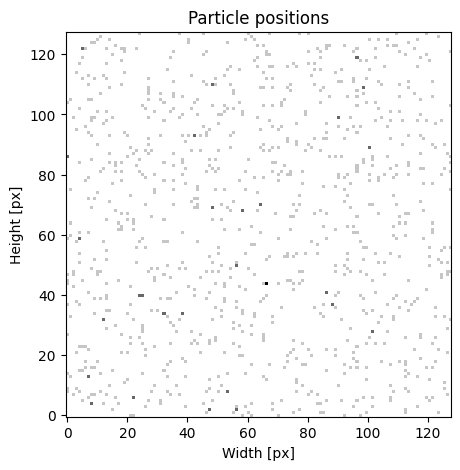

In [18]:
if save_images: filename = 'particle-positions.png'
image.plot(0, 
           with_buffer=True,
           xlabel='Width [px]',
           ylabel='Height [px]',
           title='Particle positions',
           cmap='Greys',
           origin=origin,
           figsize=figsize, 
           filename=filename);

In [19]:
image.add_reflected_light(exposures=(0.6,0.65),
                          maximum_intensity=2**16-1,
                          laser_beam_thickness=1,
                          laser_over_exposure=1,
                          laser_beam_shape=0.95,
                          alpha=1/8)

Reflected light added to images I1.


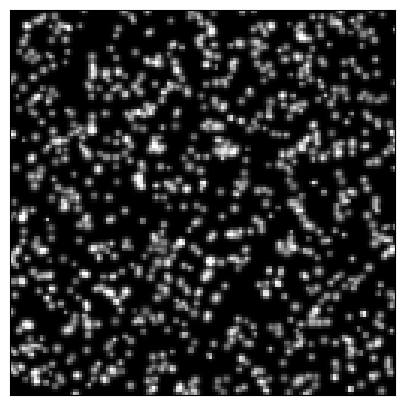

In [20]:
image.plot(0, 
           with_buffer=True,
           xticks=False,
           yticks=False,
           cmap='Greys_r',
           origin=origin,
           figsize=figsize, 
           filename='I_2.svg');

In [113]:
flowfield = FlowField(n_images,
                      size=image_size,
                      size_buffer=size_buffer,
                      random_seed=1)

In [127]:
flowfield.generate_random_velocity_field(gaussian_filters=(30,30),
                                         n_gaussian_filter_iter=10,
                                         displacement=(2,2))

In [128]:
image.add_flowfield(flowfield)

Velocity field added to the image.


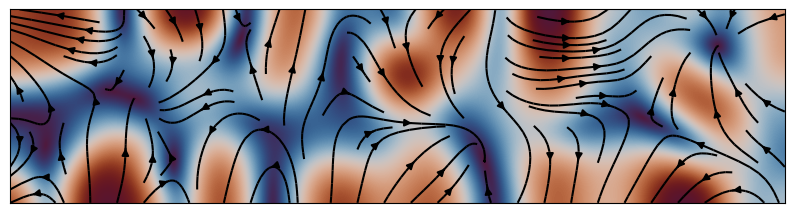

In [129]:
image.plot_field_magnitude(0,
                           with_buffer=False,
                           xticks=False,
                           yticks=False,
                           # add_quiver=True,
                           # quiver_color='r',
                           # quiver_step=50,
                           add_streamplot=True,
                           streamplot_density=1,
                           streamplot_color='k',
                           cmap=cmc.vikO,
                           cbar=False,
                           figsize=(10,10),
                           filename='ff.svg');

***